<a href="https://colab.research.google.com/github/dataengi44/Code1/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Load the dataset
df = pd.read_csv("unemployment_data.csv")

# Display the first few rows
print(df.head())



           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [8]:
print(df.isnull().sum())  # Check missing values


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


In [9]:
print(df.info())   # Data types and structure
print(df.describe())  # Summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None
       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std          

In [11]:
print(df.columns)  # Check available column names



Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [12]:
df.rename(columns=lambda x: x.strip(), inplace=True)  # Remove extra spaces


In [16]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime
df.dropna(subset=['Date'], inplace=True)  # Remove rows with invalid dates


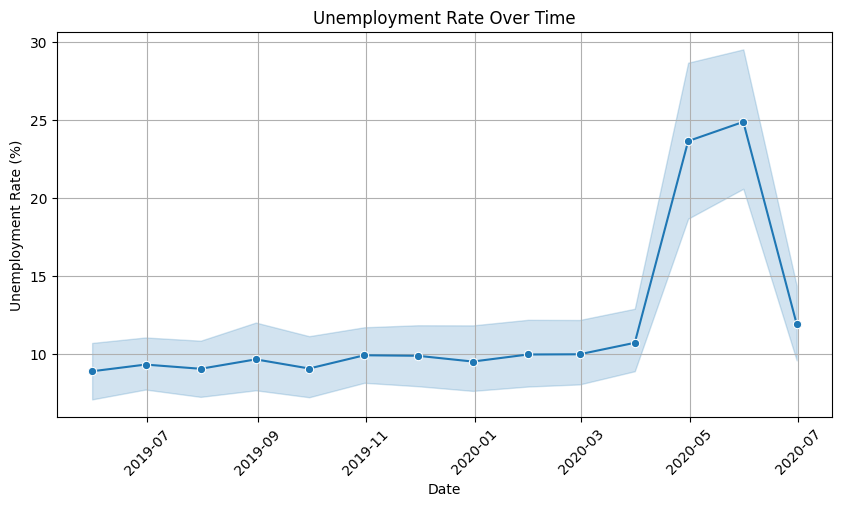

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df['Date'], y=df['Estimated Unemployment Rate (%)'], marker='o')
plt.title("Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.grid()
plt.show()


<ipython-input-20-76c8aed15958>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df, palette="viridis")


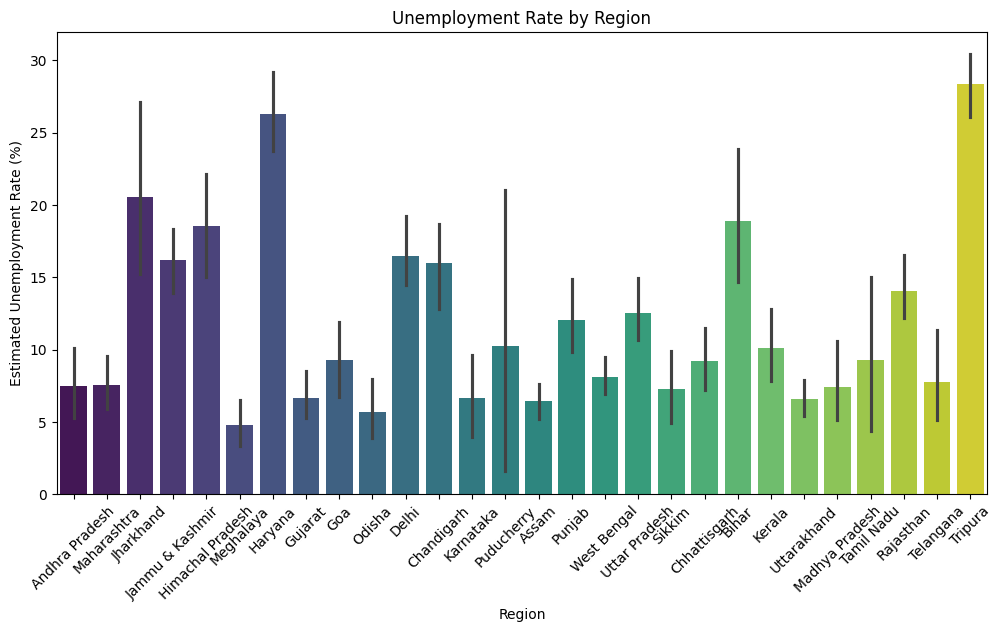

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Unemployment Rate by Region")
plt.show()


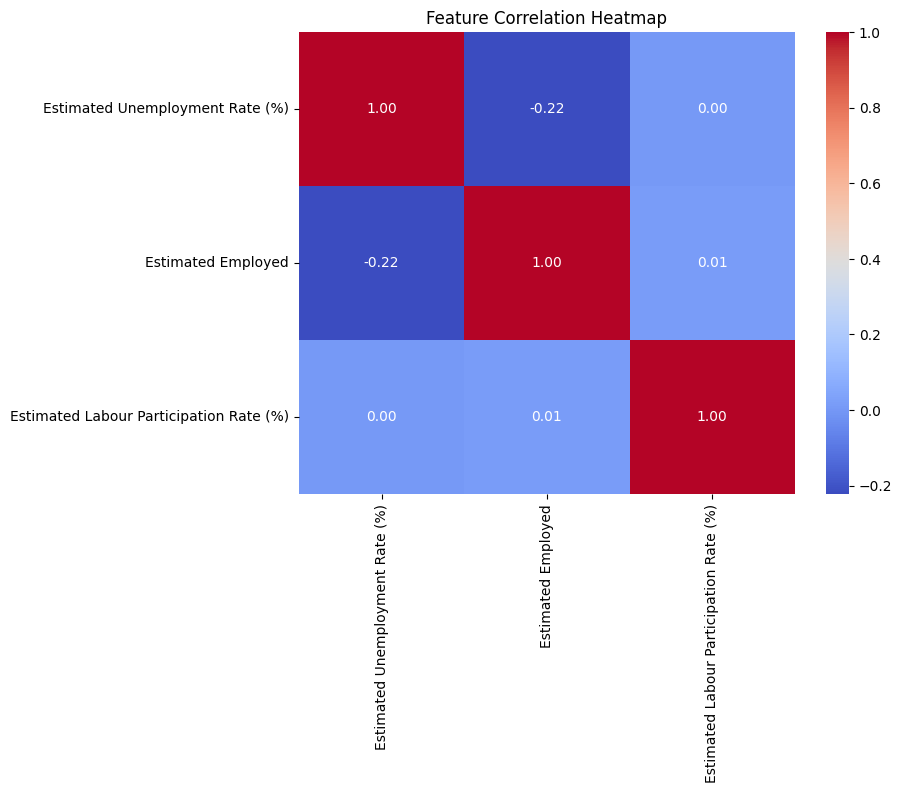

In [22]:
# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [25]:

!pip install --upgrade --quiet prophet


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwqqr5tvl/w33f2a9m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwqqr5tvl/doimqilp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8426', 'data', 'file=/tmp/tmpwqqr5tvl/w33f2a9m.json', 'init=/tmp/tmpwqqr5tvl/doimqilp.json', 'output', 'file=/tmp/tmpwqqr5tvl/prophet_modelhb02ylzv/prophet_model-20250121143410.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:34:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:34:10 - cmdstanpy - INFO - Chain 

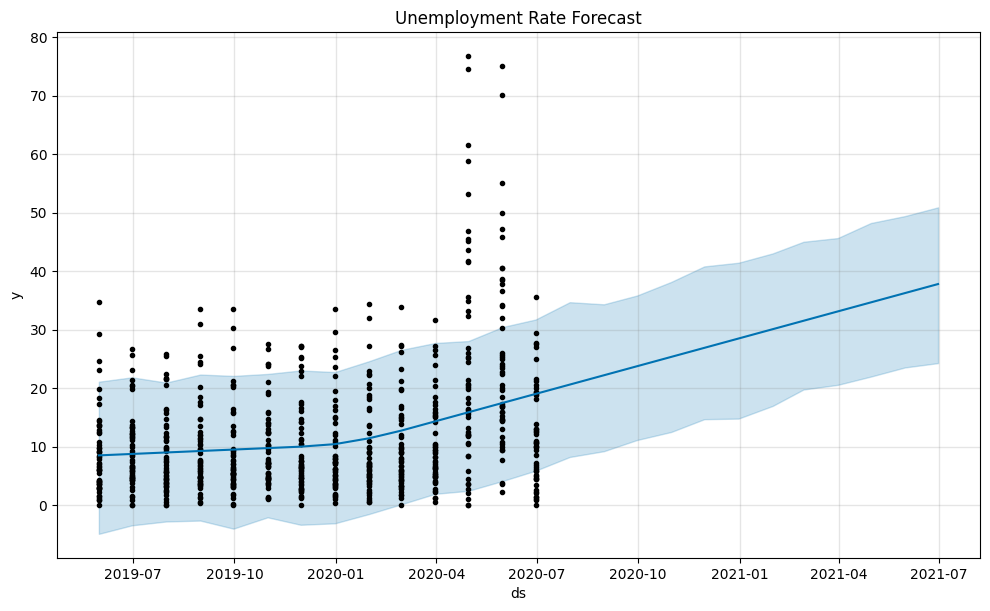

In [27]:
from prophet import Prophet  # Use 'prophet' instead of 'fbprophet'

# Prepare data
df_prophet = df[['Date', 'Estimated Unemployment Rate (%)']].copy()
df_prophet.columns = ['ds', 'y']  # Prophet requires 'ds' (date) and 'y' (target)

# Convert Date to datetime (if not already)
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Train model
model = Prophet()
model.fit(df_prophet)

# Create future dates
future = model.make_future_dataframe(periods=12, freq='M')  # Forecast for 12 months
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title("Unemployment Rate Forecast")
plt.show()
